In [17]:
import torch
import networkx as nx
from torch.utils.data import Dataset, DataLoader
import numpy as np 
from sklearn.metrics import r2_score 
import time 
from matplotlib import pyplot as plt 
import copy
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelBinarizer
import sys 
sys.path.append('../')

from src.models.GSNN import GSNN
from src.data.LincsDataset import LincsDataset
from src.models import utils 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

# edge id :                 0  1  2  3  4
edge_index = torch.tensor([[0, 1, 1, 3, 2],
                           [1, 2, 3, 2, 4]])

function_nodes = np.array([1,2,3])

In [10]:
channels = utils._degree_to_channels(edge_index, min_size=2, max_size=3)
channels

mean # of function node channels (scaled) 2.3333333333333335


array([1, 2, 3, 2, 1])

In [34]:
w1_indices, channels = utils.get_W1_indices(edge_index, 4, function_nodes, scale_by_degree=True)
w1_indices

mean # of function node channels (scaled) 2.6666666666666665


tensor([[0., 0., 1., 1., 1., 1., 2., 2., 3., 3., 3., 3.],
        [1., 2., 3., 4., 5., 6., 7., 8., 3., 4., 5., 6.]])

In [35]:
w2_indices = utils.get_W2_indices(function_nodes, channels)
w2_indices

tensor([[1., 1., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5., 5., 5., 6., 6.,
         6., 6., 7., 7., 8., 8.],
        [1., 2., 1., 2., 3., 4., 5., 6., 3., 4., 5., 6., 3., 4., 5., 6., 3., 4.,
         5., 6., 7., 8., 7., 8.]])

In [36]:
w3_indices = utils.get_W3_indices(edge_index, function_nodes, channels)
w3_indices

tensor([[1., 1., 2., 2., 3., 4., 5., 6., 7., 8.],
        [1., 2., 1., 2., 4., 4., 4., 4., 3., 3.]])

In [37]:
G2 = nx.DiGraph()

for src,dst in w1_indices.detach().cpu().numpy().T: 
    G2.add_edge(f'in-edge-{src}', f'layer1-{dst}')

for src,dst in w2_indices.detach().cpu().numpy().T: 
    G2.add_edge(f'layer1-{src}', f'layer2-{dst}')

for src,dst in w3_indices.detach().cpu().numpy().T: 
    G2.add_edge(f'layer2-{src}', f'out-edge-{dst}')



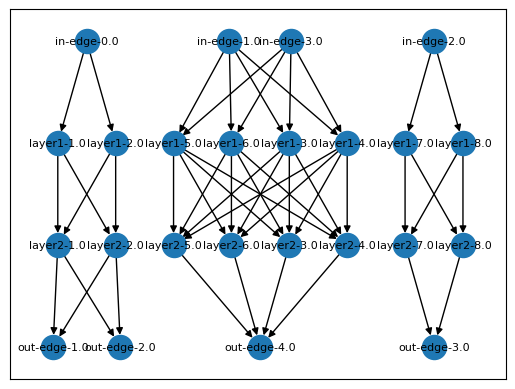

In [38]:
pos = nx.drawing.nx_agraph.graphviz_layout(G2, prog='dot')

nx.draw_networkx(G2, pos, font_size=8)